In [37]:
import sys
import os
import pandas as pd
import numpy as np
import nltk
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/travisdawson/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Raw Data Analysis

### Data Import

In [4]:
# Method to aggregate the serperate observation files
def aggregate_data(file_path, observation_sets):
    df = pd.DataFrame()
    for observation_set in observation_sets:
        df_temp = pd.read_csv(file_path + observation_set)
        df = pd.concat([df, df_temp])
    return df

In [3]:
data_path = os.path.abspath("../data/raw")
files = ['/observations_1.csv', '/observations_2.csv',
        '/observations_3.csv', '/observations_4.csv',
        '/observations_5.csv', '/observations_6.csv',
        '/observations_7.csv', '/observations_8.csv',
        '/observations_9.csv', '/observations_10.csv']
df = aggregate_data(data_path, files)

df.head()

,id,observed_on_string,observed_on,time_observed_at,time_zone,quality_grade,license,url,image_url,description,...,user_id,user_login,user_name,created_at,updated_at,sound_url,tag_list,oauth_application_id,place_guess,private_place_guess
0,128984633,2022/08/02 12:40 AM,2022-08-02,2022-08-01 14:40:00 UTC,Sydney,research,NaN,https://www.inaturalist.org/observations/12898...,https://static.inaturalist.org/photos/21914219...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,129048796,2022-08-02 07:55:55+10:00,2022-08-02,2022-08-01 21:55:55 UTC,Melbourne,research,CC-BY-NC,https://www.inaturalist.org/observations/12904...,https://inaturalist-open-data.s3.amazonaws.com...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,129051266,2022-08-02 00:20:13,2022-08-02,2022-08-01 22:20:13 UTC,Madrid,research,CC-BY,https://www.inaturalist.org/observations/12905...,https://inaturalist-open-data.s3.amazonaws.com...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,129054418,2022-08-02 00:26:13,2022-08-02,2022-08-01 22:26:13 UTC,Berlin,research,CC-BY-NC,https://www.inaturalist.org/observations/12905...,https://inaturalist-open-data.s3.amazonaws.com...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,129076855,2022-08-02 13:32:23+12:00,2022-08-02,2022-08-02 01:32:23 UTC,Wellington,research,NaN,https://www.inaturalist.org/observations/12907...,https://inaturalist-open-data.s3.amazonaws.com...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Characteristics

In [8]:
# Total observations
observation_sum = df.shape[0]
print("Total observations: ", observation_sum)

# Available columns
print("Columns: ", df.columns)

total observations:  1812593
Columns:  Index(['id', 'observed_on_string', 'observed_on', 'time_observed_at',
       'time_zone', 'quality_grade', 'license', 'url', 'image_url',
       'description', 'num_identification_agreements',
       'num_identification_disagreements', 'captive_cultivated', 'latitude',
       'longitude', 'positional_accuracy', 'public_positional_accuracy',
       'geoprivacy', 'taxon_geoprivacy', 'coordinates_obscured',
       'species_guess', 'scientific_name', 'common_name', 'iconic_taxon_name',
       'taxon_id', 'user_id', 'user_login', 'user_name', 'created_at',
       'updated_at', 'sound_url', 'tag_list', 'oauth_application_id',
       'place_guess', 'private_place_guess'],
      dtype='object')


### Good/ Bad Quality Determination
The dataset includes images that have been labelled as a wildlife species, but conists of environmental signs or scat as opposed to the presence of the wildlife.
The below method aims to utilize keywords in the description to identify such images. 
These images are aggregated in a set and labelled as bad quality. 
This labelled dataset will be used to train a quality classifier to seperate Good/ Bad quality images within the aggregate dataset.

In [11]:
obs_no_description = df['description'].isna().sum()
print("Observations with no description: ", 
      obs_no_description, 
      "(", obs_no_description / observation_sum, "%)")

obs_with_description = observation_sum - obs_no_description
print("Observations with description: ", 
      obs_with_description, 
      "(", obs_with_description / observation_sum, "%)")

Observations with no description:  1456364 ( 0.8034699460938004 %)
Observations with description:  356229 ( 0.19653005390619957 %)


In [ ]:
# Create dataset of images with description. 
df_description = df[~df.description.isna()]
df_description.descriptions.head(50)

##### WordCloud

356229


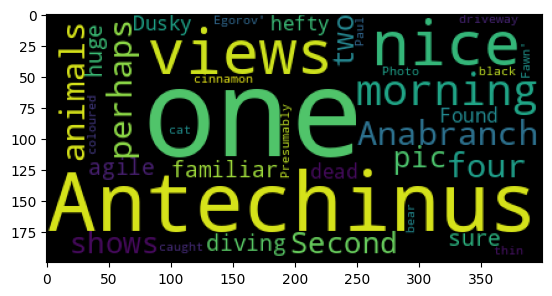

In [28]:
descriptions = df_description.description.values
print(len(descriptions))
wordcloud = WordCloud().generate(str(descriptions))
plt.imshow(wordcloud)
plt.show()

##### Word Distribution
Inspiration for the below method found: https://stackoverflow.com/questions/46786211/counting-the-frequency-of-words-in-a-pandas-data-frame 

In [ ]:
s_string = df_description.description.str.cat(sep=' ')
print(len(s_string))
words = nltk.tokenize.word_tokenize(s_string)
words_wo_stopwords = [word for word in words if not word in stopwords.words()]
print(words_wo_stopwords)
word_dist = nltk.FreqDist(words)
print (word_dist)

27225991
